,token,message_count,chat_id,occurrences,name
0,5753903548:AAGzb92AMdhYEYMy_b0zMA0xUEEsX2qQaEk,2,-856941379,1,Yuyuna
1,5753903548:AAGzb92AMdhYEYMy_b0zMA0xUEEsX2qQaEk,2,-4117172640,1,Yuyuna
2,6703426544:AAHowvJhuVV4IkdguYT2iS7TuRQWX3UGSK0,2,-856941379,1,Chloe
3,6703426544:AAHowvJhuVV4IkdguYT2iS7TuRQWX3UGSK0,2,-4117172640,1,Chloe
4,6887431223:AAEJc4s3t_hA7DxrcO-k0NvqtgrkjPUMexU,2,-856941379,1,Seraphine
5,6887431223:AAEJc4s3t_hA7DxrcO-k0NvqtgrkjPUMexU,2,-4117172640,1,Seraphine
6,6787601158:AAE4N-FWjAyE3NHKGD35nVnHt-c-o6Ptedo,2,-856941379,1,Celeste
7,6787601158:AAE4N-FWjAyE3NHKGD35nVnHt-c-o6Ptedo,2,-4117172640,1,Celeste


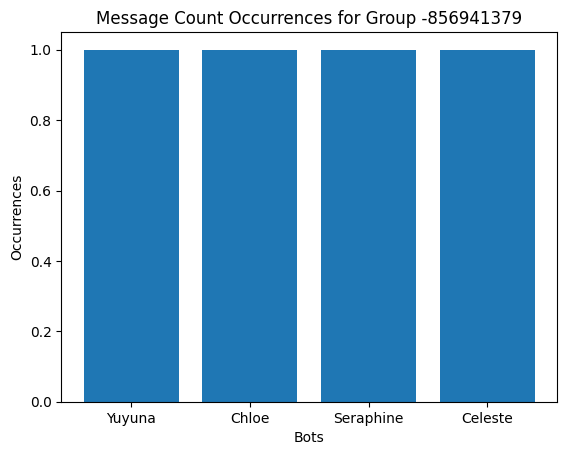

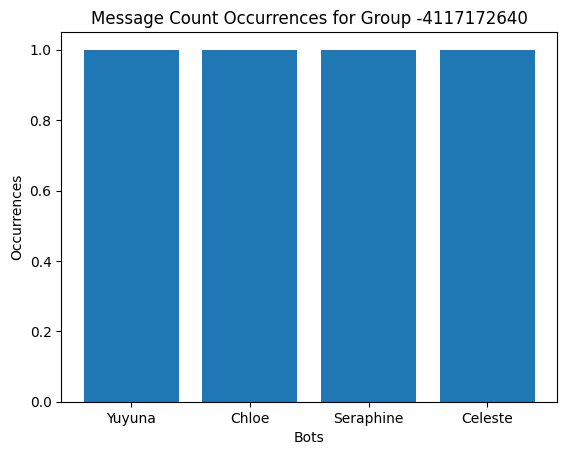

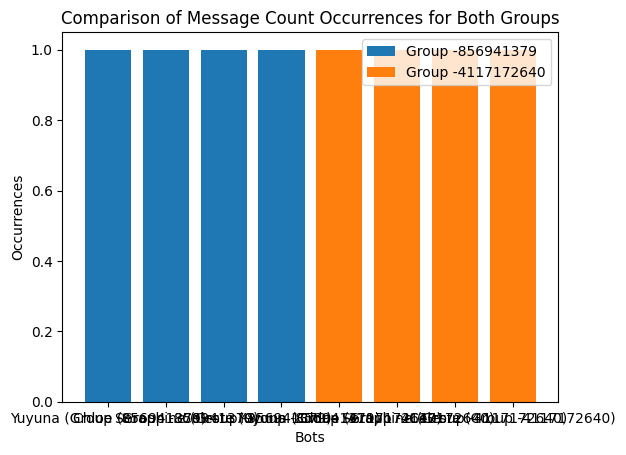

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# Step 1: Read Data from JSON File
with open('bot_stats.json', 'r') as file:
    data = json.load(file)

# Step 2: Flatten Data and Convert to DataFrame
flat_data = []
for entry in data:
    for chat_id, occurrences in entry['chat_id_occurrences'].items():
        flat_data.append({
            'token': entry['token'],
            'message_count': entry['message_count'],
            'chat_id': chat_id,
            'occurrences': occurrences
        })

df = pd.DataFrame(flat_data)

# Step 3: Map Tokens to Names
bot_tokens = {
    '5753903548:AAGzb92AMdhYEYMy_b0zMA0xUEEsX2qQaEk': 'Yuyuna',
    '6703426544:AAHowvJhuVV4IkdguYT2iS7TuRQWX3UGSK0': 'Chloe',
    '6887431223:AAEJc4s3t_hA7DxrcO-k0NvqtgrkjPUMexU': 'Seraphine',
    '6787601158:AAE4N-FWjAyE3NHKGD35nVnHt-c-o6Ptedo': 'Celeste',
    '6371828828:AAErfPToRZwoyFTcZ1jnwGRUbbg5_rlKp9M': 'Scarlett',
    '6763843999:AAGPRm9iB_GyyTKW7q6M3pY_BDA7YAUzJwU': 'Camila',
}

df['name'] = df['token'].map(bot_tokens)

# Step 4: Display DataFrame
display(df)

# Step 5: Generate and Display Bar Plots for Each Group
for group_id in df['chat_id'].unique():
    group_df = df[df['chat_id'] == group_id]
    plt.figure()
    plt.bar(group_df["name"], group_df["occurrences"])
    plt.xlabel('Bots')
    plt.ylabel('Occurrences')
    plt.title(f'Message Count Occurrences for Group {group_id}')
    plt.show()

# Step 6: Generate and Display Bar Plot to Compare Both Groups
plt.figure()
for group_id in df['chat_id'].unique():
    group_df = df[df['chat_id'] == group_id]
    plt.bar(group_df["name"] + f' (Group {group_id})', group_df["occurrences"], label=f'Group {group_id}')

plt.xlabel('Bots')
plt.ylabel('Occurrences')
plt.title('Comparison of Message Count Occurrences for Both Groups')
plt.legend()
plt.show()
